# Call dataset

In [ ]:
"""
Purdue University - Krannert School of Management
MS BAIM Program - Summer 2021
MGMT-58600-B03 - Python Programming
Final Project - Group 6
@authors: Su Tien Lee; Chayadeepsai Cherukupalli; Sri Manogna Gurijala; Alejandro Brillembourg Cuenca

"""

In [3]:
import pandas as pd
import os
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# requesting file directory
path=input('Enter directory with customer churn Data files')
os.chdir(path)
# defining and reading data file for dataframe
ccdata=pd.read_csv('BankChurners.csv')
ccdata.head()

Enter directory with customer churn Data filesC:\Users\ajbri\OneDrive - purdue.edu\01_Summer_2021\MOD-2\MGMT-58600-B03_PYT\03_Project\FinalSubmission


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880
1,712661433,Existing Customer,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,...,34516.0,0,34516.0,1.621,1444,28,1.333,0.000,0.000206,0.999790
2,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.998230,0.001771
3,788979258,Existing Customer,51,M,4,Uneducated,Single,$80K - $120K,Silver,38,...,34516.0,1515,33001.0,0.592,1293,32,0.600,0.044,0.000154,0.999850
4,715971108,Existing Customer,51,M,4,Graduate,Single,$120K +,Blue,42,...,34516.0,1763,32753.0,1.266,1550,41,1.050,0.051,0.000201,0.999800


# TRIANGLE CORRELATION HEATMAP

In [2]:
#ccdata.iloc[[0],:10]
val_list = ccdata['Education_Level'].tolist()
non_dup = list(set(val_list)).sort()

ccdata = ccdata.sort_values(by = 'Education_Level')

grouped = ccdata.groupby('Education_Level')['Customer_Age'].mean()


for i in set(val_list):
    print("The average customer age for",i,"is:",format(grouped[i],'.2f'))


NameError: name 'ccdata' is not defined

In [7]:
ccdata['Customer_Age','Education_Level'].dtypes


KeyError: ('Customer_Age', 'Education_Level')

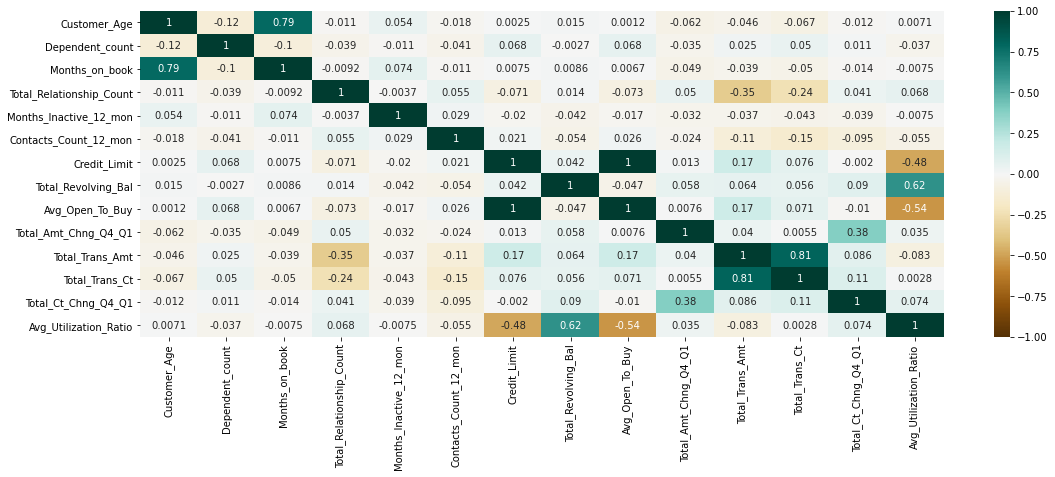

In [173]:
mask1 = ccdata['Education_Level'] == 'College'

mask2 = ccdata['Marital_Status'] == 'Married'

mask3 = ccdata['Gender'] == 'F'

df = ccdata.select_dtypes(exclude = 'object')

df.drop(df.columns[[0,15,16]], axis=1, inplace=True)

plt.figure(figsize=(18,6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

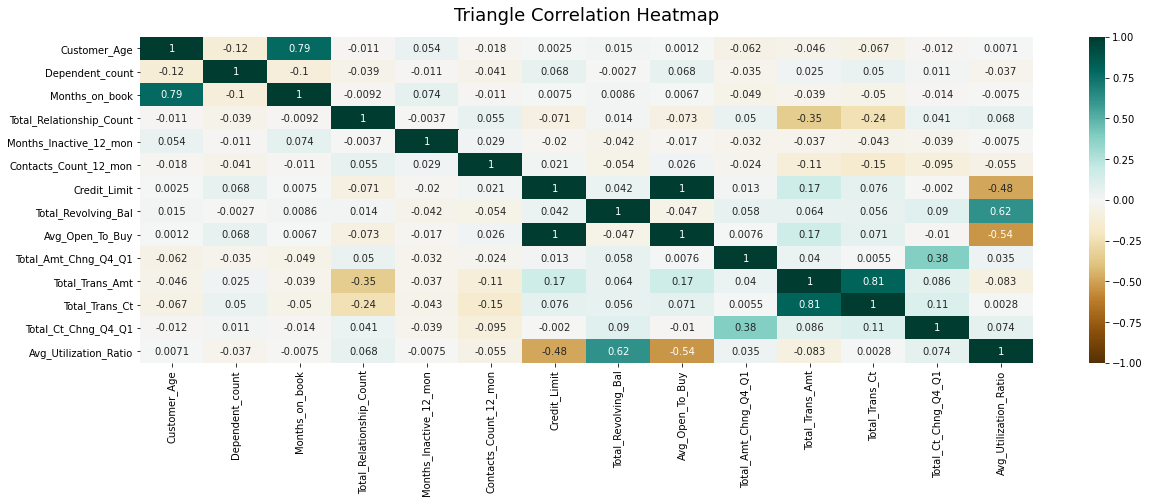

In [53]:
# creating the dataframe
dataframe=pd.read_csv('BankChurners.csv')[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
# defining the chart size
plt.figure(figsize=(20, 6))
# defining a mask for chart
# mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
# creating heatmap
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# setting heatmap chart title and additional formatting
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# EDA1. There are 4% more female customers than male customers, yet 14% more of the attrited customers are female.​

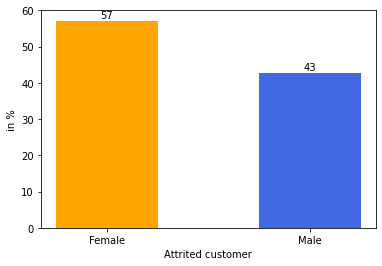

In [54]:
# grouping the data to find % share
obj = ccdata.groupby(['Attrition_Flag','Gender']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
# setting data to relevant to plot
x=state_pcts.loc['Attrited Customer','F'][0]
y=state_pcts.loc['Attrited Customer','M'][0]

# setting legend, labels and data for plotting
left = np.array(['Female','Male'])
height = np.array([x,y])
plt.xlabel('Attrited customer')
plt.ylabel('in %')

# plotting the info
plt.bar(left, height,width=0.5,color=['orange','royalblue'])
for a,b in zip(left,height):  
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10) 
plt.show()

In [65]:
x

57.16041794714198

# EDA1. There are 4% more female customers than male customers, yet 14% more of the attrited customers are female.​

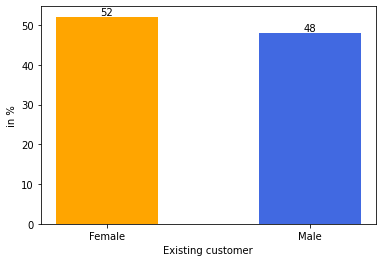

In [63]:
# grouping the data to find % share
obj = ccdata.groupby(['Attrition_Flag','Gender']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
# setting data to relevant to plot
x=state_pcts.loc['Existing Customer','F'][0]
y=state_pcts.loc['Existing Customer','M'][0]

# setting legend, labels and data for plotting
left = np.array(['Female','Male'])
height = np.array([x,y])
plt.xlabel('Existing customer')
plt.ylabel('in %')

# plotting the info
plt.bar(left, height,width=0.5,color=['orange','royalblue'])
for a,b in zip(left,height):  
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10) 
plt.show()

# EDA2. Unlike male customers, almost 90% of female customers have less than $10K of credit limit.

<AxesSubplot:ylabel='Credit limit'>

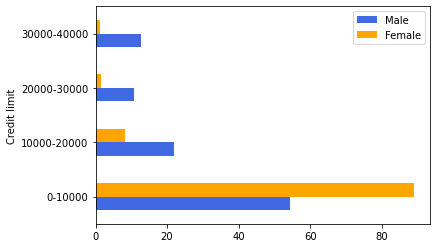

In [174]:
# defining the bin labels
Credit_limit = ['0-10000', '10000-20000', '20000-30000', '30000-40000']

# grouping the data
ccdata['CL_bin']=pd.cut(ccdata.Credit_Limit,bins=[0,10000,20000,30000,40000],labels=Credit_limit)
obj=ccdata.groupby(['CL_bin','Gender']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

# extracting relevant data
Male = list(a[a.Gender=='M']['CLIENTNUM'])
Female = list(a[a.Gender=='F']['CLIENTNUM'])

# defining and plotting dataframe
df = pd.DataFrame(
    {'Credit limit': Credit_limit,
     'Female': Female,
     'Male': Male,
    })

df.plot(x="Credit limit", y=["Male","Female"], kind="barh",color=['royalblue','orange'])

# EDA3. Every additional customer contact increases the likelihood to churn by 12%.

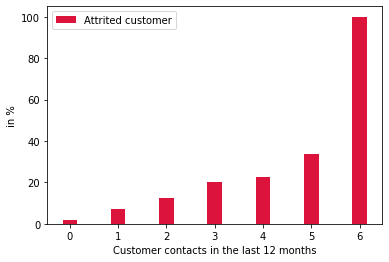

In [175]:
# describing labels
plt.xlabel('Customer contacts in the last 12 months')
plt.ylabel('in %')

# setting the plot info
a=list(ccdata.Contacts_Count_12_mon.value_counts().index)
bar_width=0.3 
tick_label=a.sort()
x=np.arange(7)

# grouping the data
obj=ccdata.groupby(['Contacts_Count_12_mon','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()
attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])

# plotting the chart
plt.bar(x,attrited,bar_width,color='crimson',label='Attrited customer')

plt.legend()
plt.xticks(x,tick_label)
plt.show()

# EDA4. There is close to a 25% drop in the average transaction amount for attrited platinum card customers.

<AxesSubplot:ylabel='Card level'>

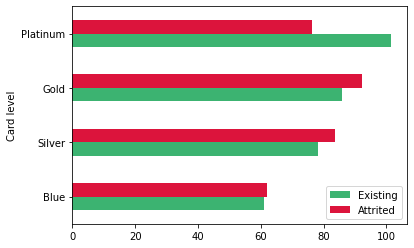

In [176]:
# grouping the data to find % share
ccdata['Average_amount_per_transaction']=ccdata['Total_Trans_Amt']/ccdata['Total_Trans_Ct']
obj = ccdata.groupby(['Attrition_Flag','Card_Category']).agg({'Average_amount_per_transaction': 'mean'})

# extracting individual card type info
state_pcts = obj.groupby(level=1).apply(lambda x:x)
x1=state_pcts.loc['Attrited Customer','Platinum'][0]
y1=state_pcts.loc['Attrited Customer','Gold'][0]
z1=state_pcts.loc['Attrited Customer','Silver'][0]
w1=state_pcts.loc['Attrited Customer','Blue'][0]
x2=state_pcts.loc['Existing Customer','Platinum'][0]
y2=state_pcts.loc['Existing Customer','Gold'][0]
z2=state_pcts.loc['Existing Customer','Silver'][0]
w2=state_pcts.loc['Existing Customer','Blue'][0]

# setting the labels and axes
Card_level = ['Blue', 'Silver', 'Gold', 'Platinum']
Attrited = [w1,z1,y1,x1]
Existing = [w2,z2,y2,x2]

# defining and plotting dataframe
df = pd.DataFrame(
    {'Card level': Card_level,
     'Attrited': Attrited,
     'Existing': Existing
    })

df.plot(x="Card level", y=["Existing","Attrited"], kind="barh",color=['mediumseagreen','crimson'])

# EDA5. Customers with less than 3 relationships are almost 2 times more likely to churn.

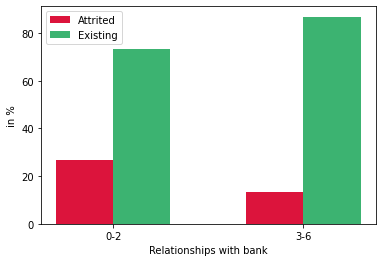

In [177]:
# describing axes
plt.xlabel('Relationships with bank')
plt.ylabel('in %')

# describing labels
tick_label=['0-2','3-6']

# grouping data
ccdata['Rl_bin']=pd.cut(ccdata.Total_Relationship_Count,bins=[0,2,6],labels=tick_label)
obj=ccdata.groupby(['Rl_bin','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

# setting plot attributes and plotting
x=np.arange(2)
attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
existing=list(a[a.Attrition_Flag=='Existing Customer']['CLIENTNUM'])
bar_width=0.3
plt.bar(x,attrited,bar_width,color='crimson',label='Attrited')
plt.bar(x+bar_width,existing,bar_width,color='mediumseagreen',label='Existing')

plt.legend()
plt.xticks(x+bar_width/2,tick_label)
plt.show()

# EDA6. 30 out of 100 customers are likely to churn if their revolving balance is below $1K.

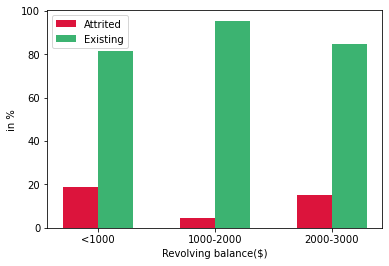

In [178]:
# describing axes
plt.xlabel('Revolving balance($)')
plt.ylabel('in %')
x=np.arange(3)
bar_width=0.3

# describing labels
tick_label=['<1000','1000-2000','2000-3000']

# grouping the data to find % share
ccdata['Rb_bin']=pd.cut(ccdata.Total_Revolving_Bal,bins=[0,1000,2000,3000],labels=tick_label)
obj=ccdata.groupby(['Rb_bin','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
existing=list(a[a.Attrition_Flag=='Existing Customer']['CLIENTNUM'])

# plotting the chart
plt.bar(x,attrited,bar_width,color='crimson',label='Attrited')
plt.bar(x+bar_width,existing,bar_width,color='mediumseagreen',label='Existing')

plt.legend()
plt.xticks(x+bar_width/2,tick_label)
    
plt.show()

# EDA7. People at the extremes of average utilization ratio have higher percentages of attrition rate.

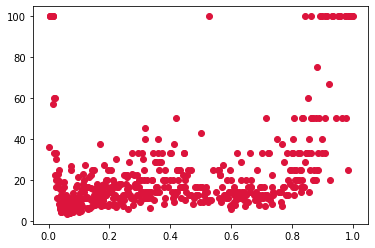

In [179]:
# grouping data and extracting columns for scatterplot
obj=ccdata.groupby(['Avg_Utilization_Ratio','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()
aver_util=list(a[a.Attrition_Flag=='Attrited Customer']['Avg_Utilization_Ratio'])
attrition=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
fig = plt.figure()   

ax = fig.add_subplot(1, 1, 1)

# plotting the chart
ax.scatter(aver_util, attrition, color='crimson')
plt.show() 

# Insight1. 30 out of 100 customers are likely to churn if their revolving balance is below $1K.

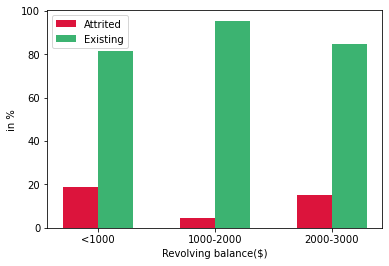

In [180]:
# describing axes
plt.xlabel('Revolving balance($)')
plt.ylabel('in %')
x=np.arange(3)
bar_width=0.3

# describing labels
tick_label=['<1000','1000-2000','2000-3000']

# grouping the data to find % share
ccdata['Rb_bin']=pd.cut(ccdata.Total_Revolving_Bal,bins=[0,1000,2000,3000],labels=tick_label)
obj=ccdata.groupby(['Rb_bin','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
existing=list(a[a.Attrition_Flag=='Existing Customer']['CLIENTNUM'])

# plotting the chart
plt.bar(x,attrited,bar_width,color='crimson',label='Attrited')
plt.bar(x+bar_width,existing,bar_width,color='mediumseagreen',label='Existing')

plt.legend()
plt.xticks(x+bar_width/2,tick_label)
    
plt.show()

# Insight2. There are no attrited customers that have made more than 100 transactions.​

<AxesSubplot:ylabel='Trans count'>

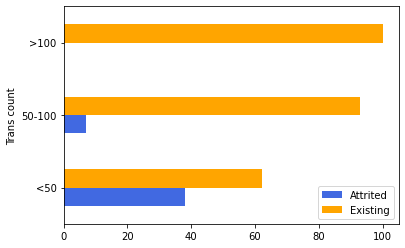

In [181]:
# describing labels
Trans_Cnt = ['<50', '50-100', '>100']

# grouping the data to find % share
ccdata['TC_bin']=pd.cut(ccdata.Total_Trans_Ct,bins=[0,50,100,150],labels=Trans_Cnt)
obj=ccdata.groupby(['TC_bin','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
existing=list(a[a.Attrition_Flag=='Existing Customer']['CLIENTNUM'])

# plotting the chart
df = pd.DataFrame(
    {'Trans count': Trans_Cnt,
     'Attrited': attrited,
     'Existing': existing,
    })

df.plot(x='Trans count', y=["Attrited","Existing"], kind="barh",color=['royalblue','orange'])